In [ ]:
#!/usr/bin/env python3
"""
Minimal test script to verify the water rocket simulation works.
"""

import sys
import os

try:
    from waterrocketpy.core.simulation import WaterRocketSimulator
    from waterrocketpy.rocket.builder import RocketBuilder,create_standard_rocket
    from waterrocketpy.core.constants import ATMOSPHERIC_PRESSURE

    print("✓ All imports successful")

    # Create a simple rocket
    print("\n1. Creating standard rocket...")
    rocket = create_standard_rocket()
    
    print(f"   Rocket created: {rocket.name}")
    print(f"   Total mass: {rocket.total_mass:.3f} kg")

    # Convert to simulation parameters
    print("\n2. Converting to simulation parameters...")
    builder = RocketBuilder.from_dict(rocket.__dict__)
    sim_params = builder.to_simulation_params()
    print(f"   Parameters ready: {len(sim_params)} parameters")

    # Run simulation
    print("\n3. Running simulation...")
    simulator = WaterRocketSimulator()

    # Short simulation for testing
    sim_settings = {"max_time": 100.0, "time_step": 0.01, "solver": "RK45"}

    flight_data = simulator.simulate(sim_params, sim_settings)
    

    print(f"   ✓ Simulation completed successfully!")
    print(f"   Maximum altitude: {flight_data.max_altitude:.2f} m")
    print(f"   Maximum velocity: {flight_data.max_velocity:.2f} m/s")
    print(f"   Flight time: {flight_data.flight_time:.2f} s")
    print(f"   Data points: {len(flight_data.time)}")

    print("\n✓ All tests passed! Your simulation is working correctly.")

except ImportError as e:
    print(f"✗ Import error: {e}")
    print("Make sure you're running this from the correct directory.")
except Exception as e:
    print(f"✗ Error: {e}")
    print(f"Error type: {type(e).__name__}")
    import traceback

    traceback.print_exc()


✓ All imports successful

1. Creating standard rocket...
   Rocket created: Standard IPT 1L Rocket
   Total mass: 0.430 kg

2. Converting to simulation parameters...
   Parameters ready: 9 parameters

3. Running simulation...
Starting water expulsion phase...
Water depleted at t=0.024s, starting air expulsion phase...
Air depleted at t=0.050s, starting coasting phase...
   ✓ Simulation completed successfully!
   Maximum altitude: 59.94 m
   Maximum velocity: 77.86 m/s
   Flight time: 7.13 s
   Data points: 765

✓ All tests passed! Your simulation is working correctly.



4. Performing energy breakdown analysis...

5. Creating energy breakdown plots...


C:\Users\Arri\Documents\Pablo\PythonProgramming\SCE\waterrocketpy\waterrocketpy\analysis\energy_breakdown_plot.py:252: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


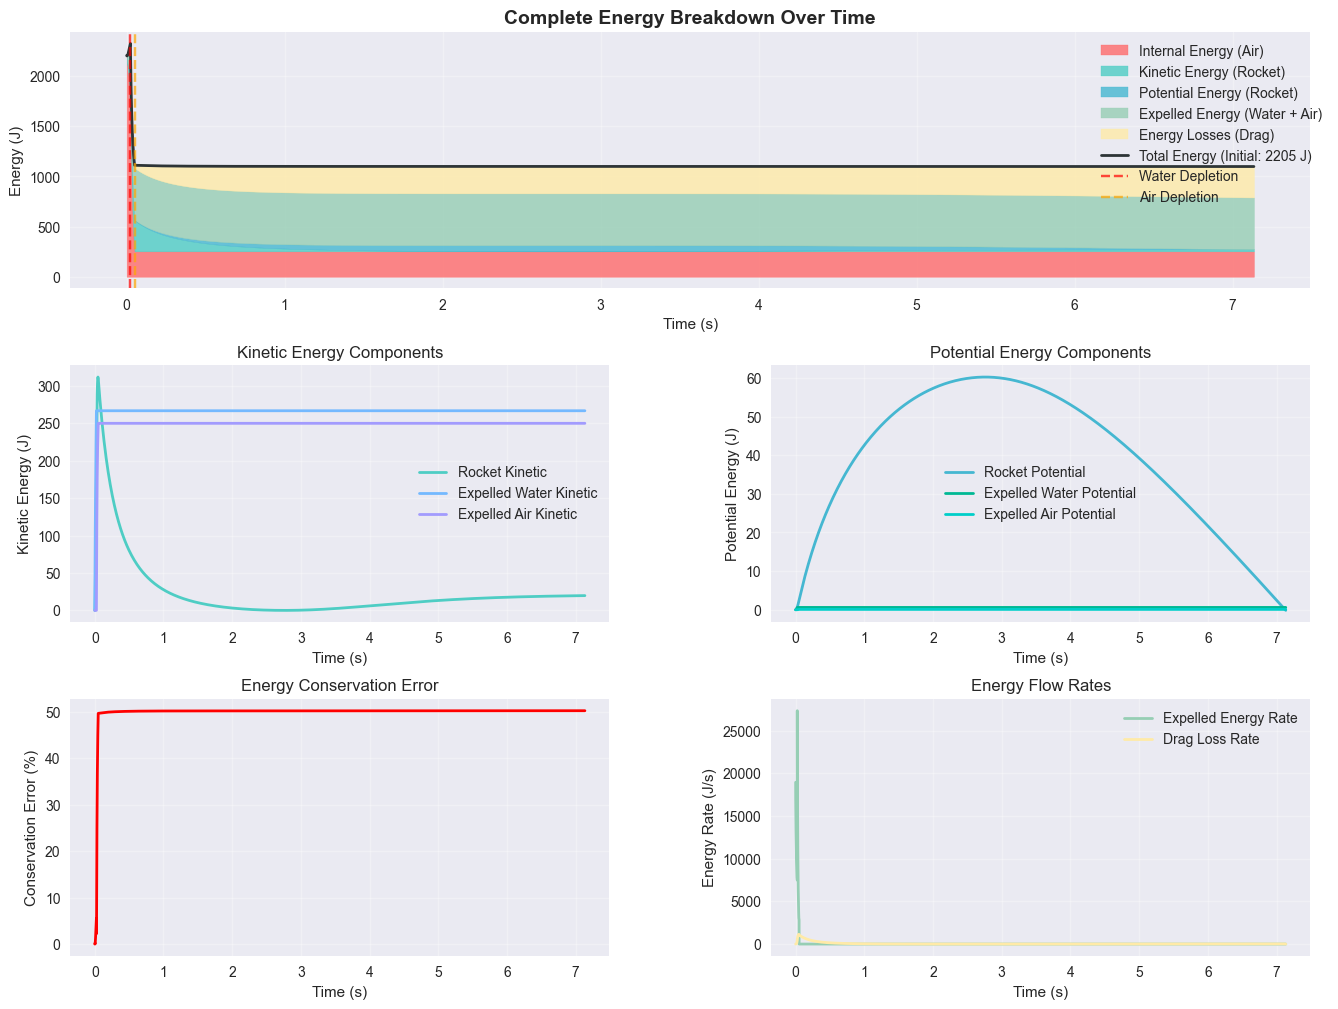

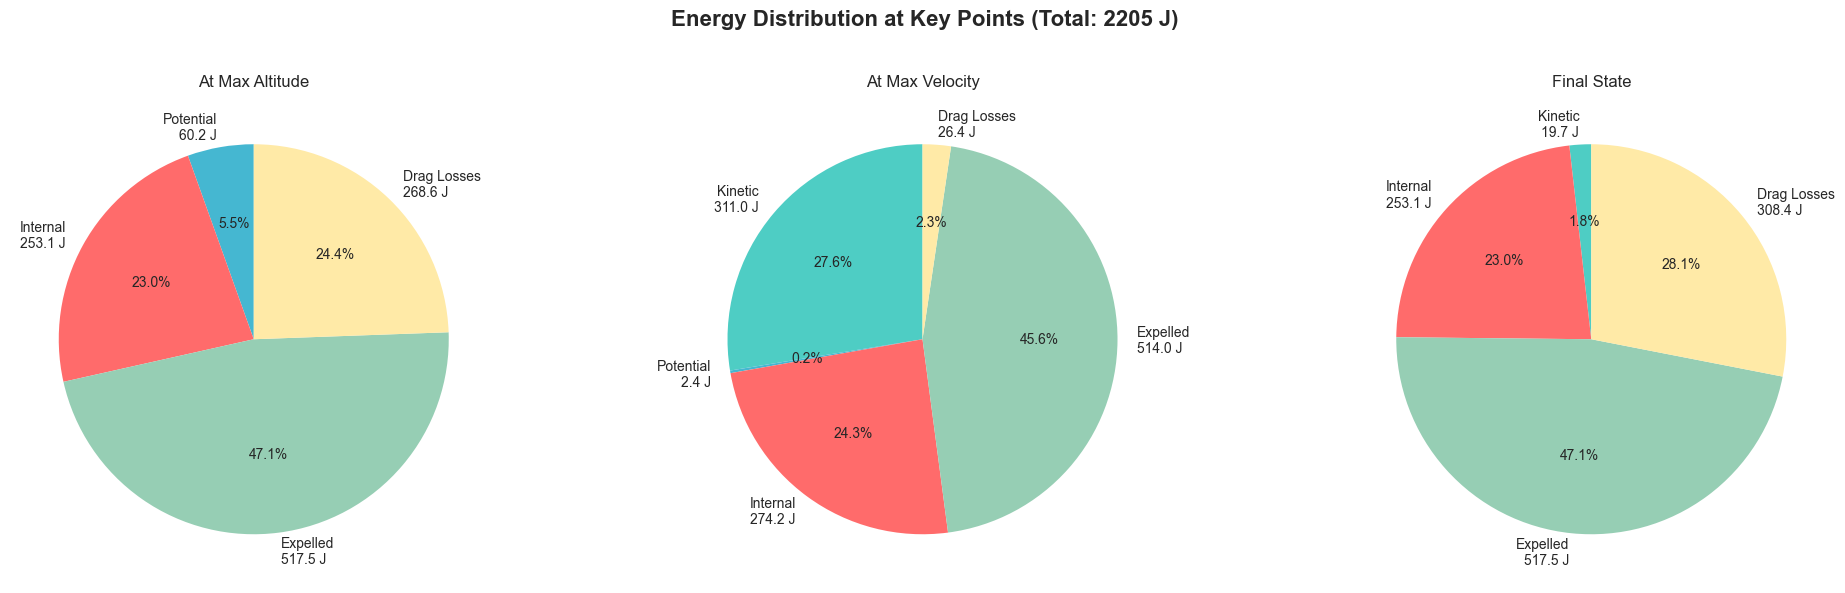

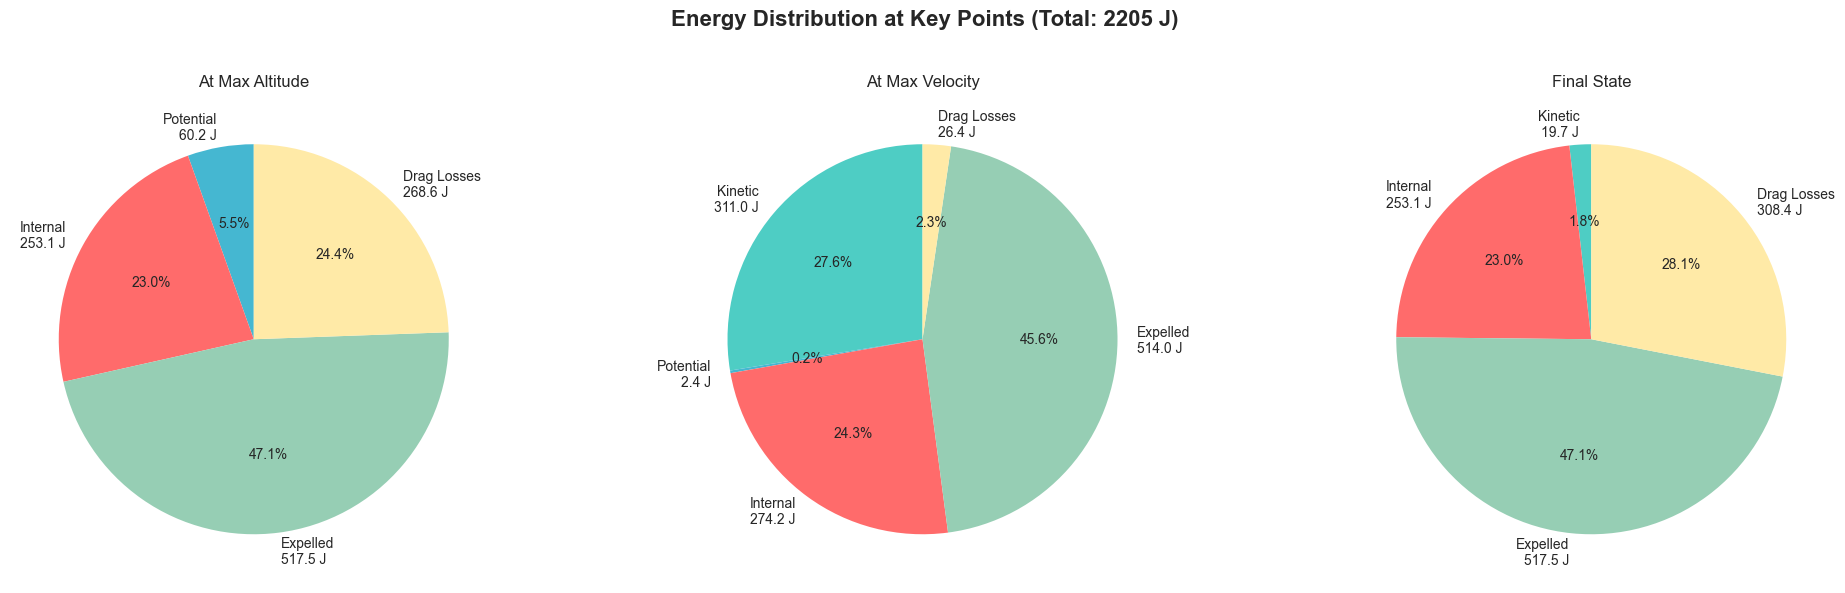

In [11]:
from waterrocketpy.analysis.energy_breakdown import tenergy_breakdown
from waterrocketpy.analysis.energy_breakdown_plot import create_energy_plots, create_energy_summary_chart

print("\n4. Performing energy breakdown analysis...")
energy_components = tenergy_breakdown(flight_data, sim_params)

# Create comprehensive energy plots
print("\n5. Creating energy breakdown plots...")
create_energy_plots(energy_components, flight_data)
create_energy_summary_chart(energy_components, flight_data)